In [239]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [240]:
# 2. Import the dataset (same directory)
df = pd.read_csv('melb_data.csv')

In [241]:
# 3. Data Visualization
print(df.head())
print(df.shape)
print(df.info())

for col in df.columns:     
    print(df[col].value_counts()/np.float64(len(df)))


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [242]:
# 4. EDA : target attribute - Type  
# h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;
print(df['Type'].value_counts())
print()
print(df['Type'].value_counts()/np.float64(len(df)))


Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

Type
h    0.695803
u    0.222165
t    0.082032
Name: count, dtype: float64


In [243]:
# 4. EDA : Missing Data Check
print(df.isnull().sum())
print((df.isnull().sum()/np.float64(len(df))).sort_values(ascending=False))

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Car              0.004566
Suburb           0.000000
Bathroom         0.000000
Regionname       0.000000
Longtitude       0.000000
Lattitude        0.000000
Landsize         0.000000
Bedroom2         0.000000
Address          0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
Prope

In [244]:
# 4. EDA : CDA 10% OVER
df = df.drop(columns=['BuildingArea','YearBuilt','CouncilArea'])

# 4. EDA : SimpleImputer 10% UNDER 
imputer = SimpleImputer(strategy='mean')
Car = df ['Car'].values.reshape (-1, 1)
imputed_Car = imputer.fit_transform(Car)
df['Car'] = imputed_Car

print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [245]:
# 4. EDA : Not Categorical data
df = df.drop(columns=['Suburb','Address','Date','Lattitude','Longtitude','Regionname'])


# 4. EDA : Categorical data Labelencoding
encoder = LabelEncoder()
df['Method'] = encoder.fit_transform(np.array(df['Method'].values.reshape(-1,1)))
df['SellerG'] = encoder.fit_transform(np.array(df['SellerG'].values.reshape(-1,1)))
df['Type'] = encoder.fit_transform(np.array(df['Type'].values.reshape(-1,1)))

c:\Users\whdwlrudtjd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\whdwlrudtjd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\whdwlrudtjd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


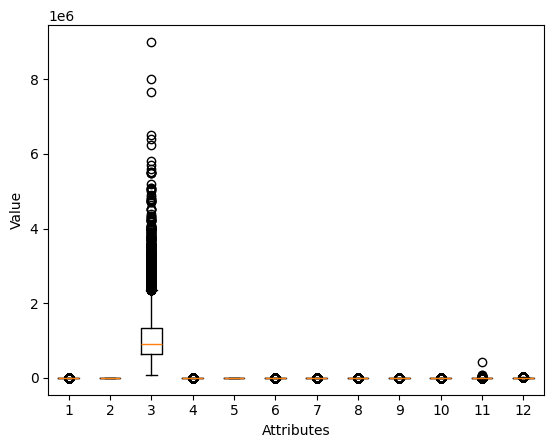

In [246]:
# 4. EDA: Outliers
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [247]:
# 5. Split data into separate training and test set
training_points = df.drop(columns=['Type'])
training_labels = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

       Rooms      Price  Method  SellerG  Distance  Postcode  Bedroom2  \
9223       2   585000.0       1       28       4.3    3032.0       2.0   
12955      3  1410000.0       1      106      12.4    3108.0       3.0   
1646       4  4350000.0       1      135       9.0    3126.0       4.0   
3822       3   980000.0       1      161      11.2    3145.0       3.0   
2708       3   875000.0       1      239       6.4    3011.0       3.0   
...      ...        ...     ...      ...       ...       ...       ...   
6017       3   670000.0       1       67      13.3    3020.0       3.0   
709        2   360000.0       0       32      13.0    3204.0       2.0   
10679      3  1070000.0       1       90      16.7    3150.0       3.0   
8366       2   800000.0       4       19       3.3    3141.0       2.0   
1146       4  2250000.0       3      135      11.2    3186.0       4.0   

       Bathroom  Car  Landsize  Propertycount  
9223        2.0  2.0   37000.0         4918.0  
12955       1.0

In [248]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[0 0 2 ... 2 0 0]


In [249]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[2605   32  169]
 [ 271   15   58]
 [ 452   25  447]]
0.7528227785959745


In [250]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 2 ... 0 0 0]
[[2627    2  177]
 [ 283    0   61]
 [ 431    1  492]]
0.7655866470299459


In [251]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 30)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 2 ... 0 0 0]
[[2591    0  215]
 [ 285    0   59]
 [ 408    0  516]]
0.7626411389297987


[0.7120765832106039, 0.7322042218949435, 0.7449680903289151, 0.7503681885125184, 0.7528227785959745, 0.7594501718213058, 0.7623956799214531, 0.761168384879725, 0.7621502209131075, 0.7658321060382917, 0.7695139911634757, 0.7677957781050565, 0.7673048600883653, 0.7673048600883653, 0.7655866470299459, 0.7677957781050565, 0.7670594010800197, 0.7685321551300933, 0.7687776141384389, 0.7690230731467845, 0.7675503190967109, 0.7665684830633285, 0.7660775650466373, 0.7658321060382917, 0.7658321060382917, 0.7653411880216003, 0.7648502700049091, 0.7631320569464899, 0.7626411389297987, 0.7626411389297987, 0.7623956799214531, 0.7609229258713794, 0.7614138438880707, 0.7626411389297987, 0.7596956308296514, 0.7589592538046146, 0.761168384879725, 0.7614138438880707, 0.7626411389297987, 0.7619047619047619, 0.7636229749631811, 0.7631320569464899, 0.7643593519882179, 0.7650957290132547, 0.7646048109965635, 0.7641138929798723, 0.7623956799214531, 0.7648502700049091, 0.7626411389297987, 0.7628865979381443, 0

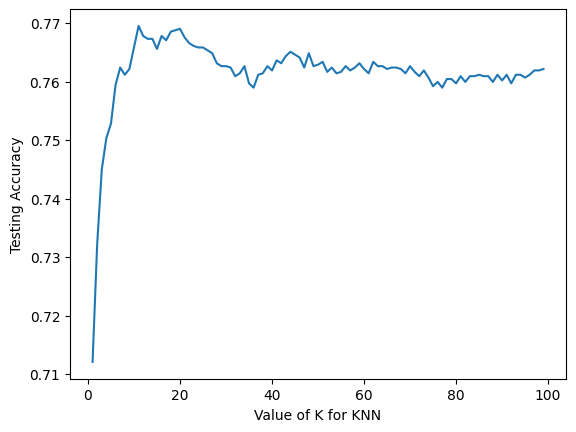

In [252]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [253]:
# 8. Improving Accuracy: Changing split ratio
training_points = df.drop(columns=['Type'])
training_labels = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10864, 11)
(10864,)
(2716, 11)
(2716,)


[0.7142857142857143, 0.7319587628865979, 0.7470544918998527, 0.7452135493372607, 0.7533136966126657, 0.751840942562592, 0.7573637702503682, 0.7628865979381443, 0.759941089837997, 0.7650957290132547, 0.7650957290132547, 0.7691458026509573, 0.7695139911634757, 0.7669366715758469, 0.7709867452135494, 0.770618556701031, 0.7713549337260678, 0.7731958762886598, 0.7684094256259205, 0.7676730486008837, 0.7684094256259205, 0.7684094256259205, 0.7680412371134021, 0.7665684830633285, 0.7647275405007363, 0.7639911634756995, 0.7621502209131075, 0.7639911634756995, 0.7636229749631811, 0.7654639175257731, 0.7639911634756995, 0.7636229749631811, 0.7639911634756995, 0.7643593519882179, 0.7621502209131075, 0.7614138438880707, 0.7614138438880707, 0.7617820324005891, 0.7621502209131075, 0.7625184094256259, 0.7636229749631811, 0.7628865979381443, 0.7606774668630338, 0.7603092783505154, 0.7614138438880707, 0.7614138438880707, 0.7592047128129602, 0.7621502209131075, 0.7621502209131075, 0.7647275405007363, 0.

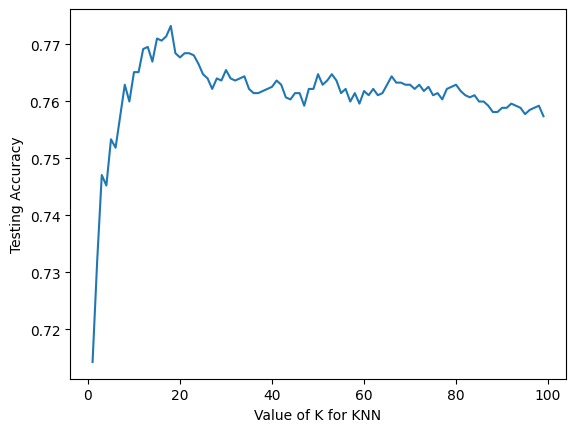

In [254]:
# 8. Improving Accuracy: Changing split ratio
# Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<Axes: >

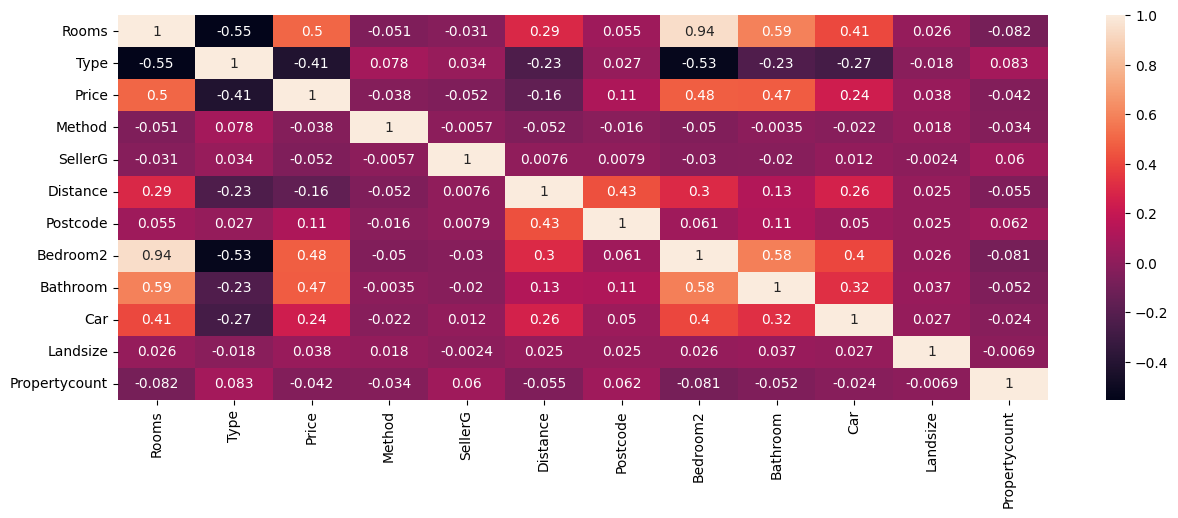

In [255]:
# 9. Improving Accuracy: Feature Engineering
dfcorr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(data = dfcorr, annot=True)

In [256]:
# 10. Improving Accuracy: Feature Engineering
df = df.drop(columns=['Method','SellerG','Postcode','Landsize','Propertycount'])

In [257]:
# 11. Split data into separate training and test set
training_points = df.drop(columns=['Type'])
training_labels = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10864, 6)
(10864,)
(2716, 6)
(2716,)


[0.7242268041237113, 0.7636229749631811, 0.7695139911634757, 0.7835051546391752, 0.7790868924889544, 0.7849779086892489, 0.7882916053019146, 0.7879234167893961, 0.7871870397643593, 0.7897643593519882, 0.792341678939617, 0.7916053019145802, 0.7938144329896907, 0.7897643593519882, 0.7919734904270986, 0.7871870397643593, 0.7882916053019146, 0.7879234167893961, 0.790500736377025, 0.790500736377025, 0.7912371134020618, 0.788659793814433, 0.7875552282768777, 0.7857142857142857, 0.7853460972017673, 0.7875552282768777, 0.7853460972017673, 0.7827687776141384, 0.7801914580265096, 0.7801914580265096, 0.7798232695139912, 0.7794550810014728, 0.7783505154639175, 0.7761413843888071, 0.7754050073637703, 0.7739322533136966, 0.772459499263623, 0.770618556701031, 0.7702503681885126, 0.7702503681885126, 0.7676730486008837, 0.7698821796759941, 0.7676730486008837, 0.7673048600883653, 0.7673048600883653, 0.7669366715758469, 0.7673048600883653, 0.7684094256259205, 0.7673048600883653, 0.7698821796759941, 0.772

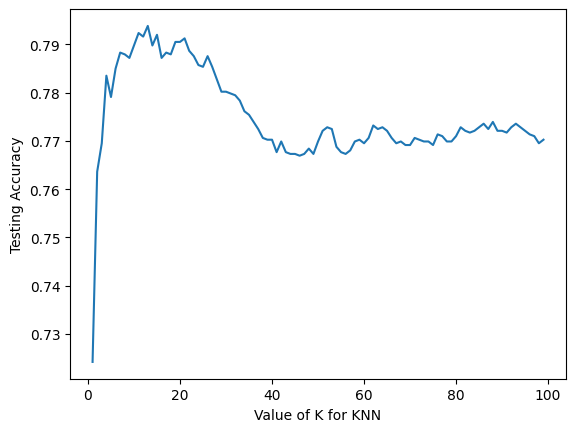

In [258]:
# 11. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [259]:
# 12. Improving Accuracy: Feature Scaling
df.describe()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car
count,13580.000000,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,0.526362,1.075684e+06,10.137776,2.914728,1.534242,1.610075
std,0.955748,0.832878,6.393107e+05,5.868725,0.965921,0.691712,0.960433
min,1.000000,0.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000
50%,3.000000,0.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000
75%,3.000000,1.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000
max,10.000000,2.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000


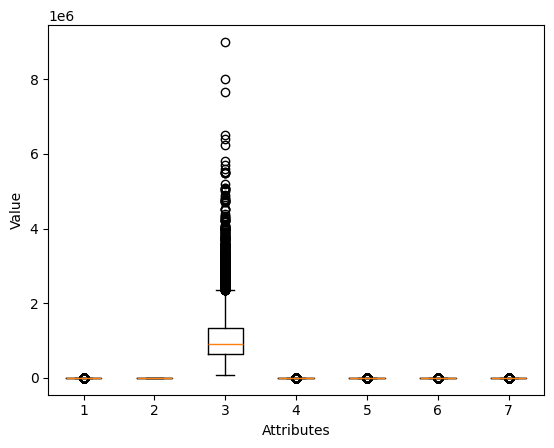

In [260]:
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

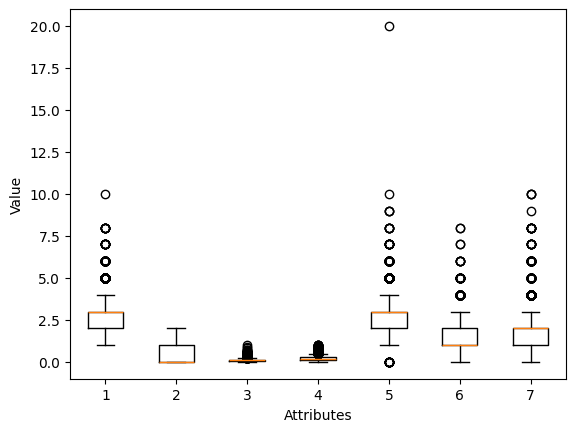

In [261]:
# 12. Improving Accuracy: Feature Scaling

df = df.copy()

scaler = MinMaxScaler()

features = [['Price', 'Distance']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()



In [262]:
# 13. Split data into separate training and test set
training_points = df.drop(columns=['Type'])
training_labels = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10864, 6)
(10864,)
(2716, 6)
(2716,)


[0.7982326951399117, 0.8133284241531664, 0.8310014727540501, 0.8284241531664213, 0.8317378497790869, 0.8306332842415317, 0.8284241531664213, 0.8310014727540501, 0.8280559646539027, 0.8321060382916053, 0.8332106038291606, 0.8328424153166422, 0.8324742268041238, 0.8339469808541974, 0.833578792341679, 0.8379970544918999, 0.8368924889543446, 0.8376288659793815, 0.8346833578792342, 0.835419734904271, 0.8346833578792342, 0.8361561119293078, 0.8379970544918999, 0.8387334315169367, 0.8376288659793815, 0.8383652430044183, 0.8365243004418262, 0.8376288659793815, 0.8379970544918999, 0.8343151693667158, 0.8350515463917526, 0.833578792341679, 0.835419734904271, 0.8357879234167894, 0.8357879234167894, 0.8346833578792342, 0.8346833578792342, 0.8350515463917526, 0.8346833578792342, 0.8350515463917526, 0.8339469808541974, 0.8343151693667158, 0.8346833578792342, 0.8339469808541974, 0.8324742268041238, 0.8310014727540501, 0.8310014727540501, 0.8310014727540501, 0.8306332842415317, 0.8332106038291606, 0.8

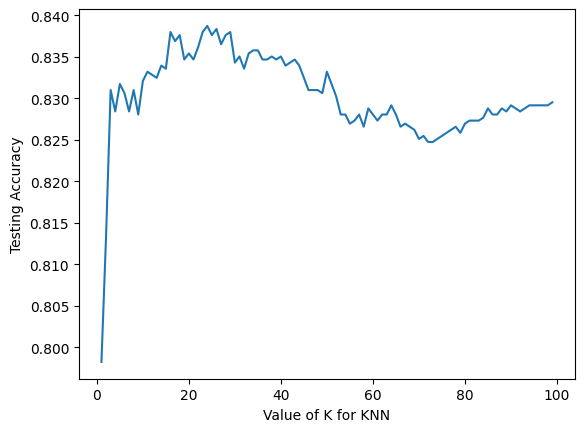

In [263]:
# 14. Check Accuracy Score : KNN
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [264]:
# 15. Check Accuracy Score : NB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 ... 0 2 0]
[[1584   32  243]
 [ 147   17   71]
 [  91   13  518]]
0.7801914580265096


In [265]:
# 15. Check Accuracy Score : SVM
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 ... 0 2 0]
[[1693    0  166]
 [ 169    0   66]
 [ 119    0  503]]
0.8085419734904271
